# Libraries

In [5]:
import pandas as pd
import numpy as np
import pyreadstat as py
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from statsmodels.regression.linear_model import OLS

In [6]:
df1 = pd.read_spss("Datasets/ATP_49/ATP_W49.sav")

In [7]:
df1.to_csv('Datasets/ATP_49/DF1.csv')

In [13]:
for i in df1.columns:
    print(i)

QKEY
DEVICE_TYPE_W49
LANG_W49
FORM_W49
SOCMEDIAUSEa_W49
SOCMEDIAUSEb_W49
SOCMEDIAUSEc_W49
SOCMEDIAUSEd_W49
SNSUSER_W49
ELECTFTGSNSINT_W49
TALKDISASNSINT_W49
TALKCMNSNSINT_W49
SECUR1_W49
PRIVACYNEWS1_W49
HOMEASSIST1_W49
HOMEASSIST2_W49
HOMEASSIST3_W49
HOMEASSIST4_W49
HOMEASSIST5a_W49
HOMEASSIST5b_W49
HOMEIOT_W49
FITTRACK_W49
LOYALTY_W49
DNATEST_W49
TRACKCNT_W49
TRACKCO1a_W49
TRACKCO1b_W49
CONCERNCO_W49
BENEFITCO_W49
CONTROLCO_W49
UNDERSTANDCO_W49
POSNEGCO_W49
ANONYMOUS1CO_W49
TRACKGOV1a_W49
TRACKGOV1b_W49
CONCERNGOV_W49
BENEFITGOV_W49
CONTROLGOV_W49
UNDERSTANDGOV_W49
POSNEGGOV_W49
ANONYMOUS1GOV_W49
CONCERNGRPa_W49
CONCERNGRPb_W49
CONCERNGRPc_W49
CONCERNGRPd_W49
CONCERNGRPe_W49
CONCERNGRPf_W49
CONTROLGRPa_W49
CONTROLGRPb_W49
CONTROLGRPc_W49
CONTROLGRPd_W49
CONTROLGRPe_W49
CONTROLGRPf_W49
PP1_W49
PP2_W49
PP3_W49
PP4_W49
PP5a_W49
PP5b_W49
PP5c_W49
PP5d_W49
PP5e_W49
PP6a_W49
PP6b_W49
PP6c_W49
PRIVACYREG_W49
GOVREGV1_W49
GOVREGV2_W49
SHARE1_W49
KNOW1_W49
KNOW2_W49
KNOW3_W49
KNOW4_W49
KNOW5_W

In [15]:
df1['F_CREGION']

0        West
1        West
2       South
3       South
4       South
        ...  
4267     West
4268     West
4269     West
4270     West
4271     West
Name: F_CREGION, Length: 4272, dtype: category
Categories (4, object): ['Midwest', 'Northeast', 'South', 'West']

# Table of Contents

* [Columns](#columns)
* [Tech-Knowledge Questions](#questions)
* [Levels of Concern](#concern)
* [Concern v. Understand](#concern_underst)
* [Government](#gov)
* [Education](#edu)
    * [Risk outweigh benefit](#edurisk)
* [Age Comparisons](#age)
    * [Risk outweigh benefit](#agerisk)
* [Concern over certain aspects](#topic_concern)
* [Party Affiliation](#party)
    * [Risk outweigh benefit](#party_risk)

# Levels of Concern

<AxesSubplot:title={'center':'How concerned are you about how companies use your data?'}>

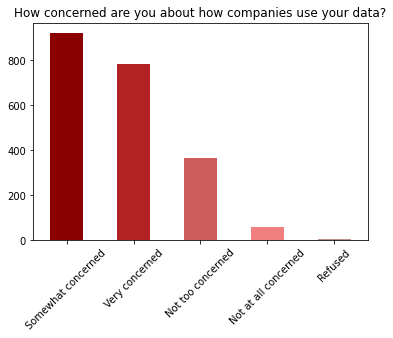

In [117]:
#Concern whether company has data
company_concern = df1['CONCERNCO_W49'].value_counts()
company_concern.plot(kind='bar', title='How concerned are you about how companies use your data?',color=['darkred', 'firebrick', 'indianred', 'lightcoral', 'rosybrown'], rot=45)

<AxesSubplot:title={'center':'How concerned are you about how the government uses your data?'}>

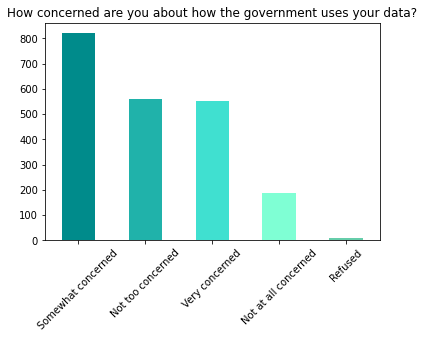

In [118]:
#concern whether gov has data 
gov_concern = df1['CONCERNGOV_W49'].value_counts()
gov_concern.plot(kind='bar', title='How concerned are you about how the government uses your data?', color=['darkcyan', 'lightseagreen', 'turquoise', 'aquamarine', 'mediumaquamarine' ], rot=45
            )

## Concern according to handler

([<matplotlib.axis.XTick at 0x1237774f0>,
 [Text(0, 0, 'law enforcement'),
  Text(1, 0, 'advertisers'),
  Text(2, 0, 'your employer'),
  Text(3, 0, 'companies you buy from'),
  Text(4, 0, 'friends/family'),
  Text(5, 0, 'social media sites you use')])

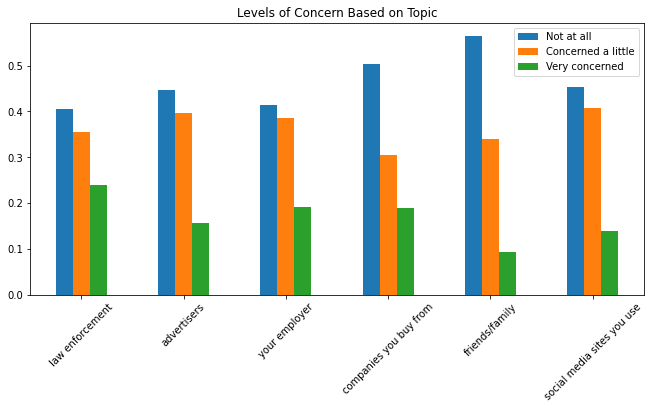

In [120]:
#Create dataframe
concern_df = df1[['CONCERNGRPa_W49', 'CONCERNGRPb_W49', 'CONCERNGRPc_W49','CONCERNGRPd_W49', 'CONCERNGRPe_W49', 'CONCERNGRPf_W49']]


#Divy up topics
law_concern = concern_df["CONCERNGRPa_W49"].value_counts(normalize=True)
ad_concern = concern_df["CONCERNGRPb_W49"].value_counts(normalize=True)
emp_concern = concern_df["CONCERNGRPc_W49"].value_counts(normalize=True)
comp_concern = concern_df["CONCERNGRPd_W49"].value_counts(normalize=True)
fr_fam_concern = concern_df["CONCERNGRPe_W49"].value_counts(normalize=True)
soc_concern = concern_df["CONCERNGRPf_W49"].value_counts(normalize=True)


#Define x-axis values
data = { 'Topics':  ['law enforcement', 'advertisers', 'your employer', 'companies you buy from', 'friends/family', 'social media sites you use'],
        'Not at all':  ['law enforcement', 'advertisers', 'your employer', 'companies you buy from', 'friends/family', 'social media sites you use'],
        'Concerned a little': ['law enforcement', 'advertisers', 'your employer', 'companies you buy from', 'friends/family', 'social media sites you use'],
        'Very concerned': ['law enforcement', 'advertisers', 'your employer', 'companies you buy from', 'friends/family', 'social media sites you use'],
        }

concern_level = pd.DataFrame (data, columns = ['Topics','Not at all','Concerned a little','Very concerned'])

topic_list = ['law enforcement', 'advertisers', 'your employer', 'companies you buy from', 'friends/family', 'social media sites you use']

#Enter info into bars
concern_level['Not at all'][0] = law_concern[0]
concern_level['Concerned a little'][0] = law_concern[1]
concern_level['Very concerned'][0] = law_concern[2]

concern_level['Not at all'][1] = ad_concern[0]
concern_level['Concerned a little'][1] = ad_concern[1]
concern_level['Very concerned'][1] = ad_concern[2]

concern_level['Not at all'][2] = emp_concern[0]
concern_level['Concerned a little'][2] = emp_concern[1]
concern_level['Very concerned'][2] = emp_concern[2]

concern_level['Not at all'][3] = comp_concern[0]
concern_level['Concerned a little'][3] = comp_concern[1]
concern_level['Very concerned'][3] = comp_concern[2]

concern_level['Not at all'][4] = fr_fam_concern[0]
concern_level['Concerned a little'][4] = fr_fam_concern[1]
concern_level['Very concerned'][4] = fr_fam_concern[2]

concern_level['Not at all'][5] = soc_concern[0]
concern_level['Concerned a little'][5] = soc_concern[1]
concern_level['Very concerned'][5] = soc_concern[2]


#Create plot
concern_level_plot = concern_level.plot(kind='bar', figsize = (11,5), title = 'Levels of Concern Based on Topic')
plt.xticks(list(range(0,6)),topic_list, rotation=45)


## Concern according to topic

In [ ]:
DATAUSEa_W49
DATAUSEb_W49
DATAUSEc_W49
DATAUSEd_W49
DATAUSEe_W49
DATAUSEf_W49

# Understanding

<AxesSubplot:title={'center':'How much do you understand what companies are doing with your data?'}>

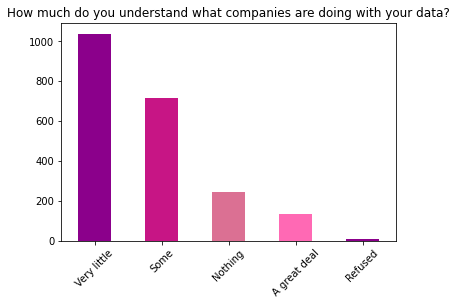

In [199]:
company_understand = df1['UNDERSTANDCO_W49'].value_counts()
company_understand.plot(kind='bar', title='How much do you understand what companies are doing with your data?',color=['darkmagenta', 'mediumvioletred', 'palevioletred', 'hotpink'], rot=45)

<AxesSubplot:title={'center':'How much do you understand what the government is doing with your data?'}>

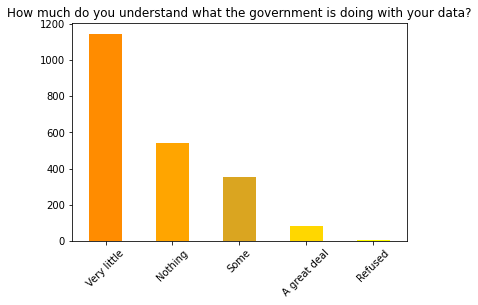

In [200]:
gov_understand = df1['UNDERSTANDGOV_W49'].value_counts()
gov_understand.plot(kind='bar', title='How much do you understand what the government is doing with your data?', color= ['darkorange', 'orange', 'goldenrod', 'gold', 'yellow'], rot=45)


<a class="anchor" id="questions"></a>

# Tech-Knowledge Questions

## Filter out correct answers

In [15]:
#Question 1
Correct1 = df1["KNOW1_W49"].isin(["Can track your visits and activity on the site"])
len(Correct1[Correct1==True])

percent_know_1 = ((len(Correct1[Correct1==True])) / (len(df1["KNOW1_W49"])))*100

#Question 2
Correct2 = df1["KNOW2_W49"].isin(["Allowing companies to purchase advertisements on their platforms"])
len(Correct2[Correct2==True])

percent_know_2 = ((len(Correct2[Correct2==True])) / (len(df1["KNOW2_W49"])))*100

#Question 3
Correct3 = df1["KNOW3_W49"].isin(["Has created a contract between itself and its users about how it will use their data"])
len(Correct3[Correct3==True])

percent_know_3 = ((len(Correct3[Correct3==True])) / (len(df1["KNOW3_W49"])))*100

#Question 4
Correct4 = df1["KNOW4_W49"].isin(["Information entered into the site is encrypted"])
len(Correct4[Correct4==True])

percent_know_4 = ((len(Correct4[Correct4==True])) / (len(df1["KNOW4_W49"])))*100

#Question 5
Correct5 = df1["KNOW5_W49"].isin(["All of the above"])
len(Correct5[Correct5==True])

percent_know_5 = ((len(Correct5[Correct5==True])) / (len(df1["KNOW5_W49"])))*100

#Question 6
Correct6 = df1["KNOW6_W49"].isin(["WhatsApp and Instagram"])
len(Correct6[Correct6==True])

percent_know_6 = ((len(Correct6[Correct6==True])) / (len(df1["KNOW6_W49"])))*100

#Question 7
Correct7 = df1["KNOW7_W49"].isin(["Internet service providers should treat all traffic on their networks equally"])
len(Correct7[Correct7==True])

percent_know_7 = ((len(Correct7[Correct7==True])) / (len(df1["KNOW7_W49"])))*100

#Question 8
Correct8 = df1["KNOW8_W49"].isin(["A coworker who uses the same computer"])
len(Correct8[Correct8==True])

percent_know_8 = ((len(Correct8[Correct8==True])) / (len(df1["KNOW8_W49"])))*100

#Question 9
Correct9 = df1["KNOW9_W49"].isin(["Picture of 2-step code"])
len(Correct9[Correct9==True])

percent_know_9 = ((len(Correct9[Correct9==True])) / (len(df1["KNOW9_W49"])))*100

#Question 10
Correct10 = df1["KNOW10_W49"].isin(["Jack Dorsey, co-founder of Twitter"])
len(Correct10[Correct10==True])

percent_know_10 = ((len(Correct10[Correct10==True])) / (len(df1["KNOW10_W49"])))*100

## Dataframe % Correct Answers

In [18]:
correct_values = [percent_know_1, percent_know_2, percent_know_3, percent_know_4, percent_know_5, percent_know_6, percent_know_7, percent_know_8, percent_know_9, percent_know_10]

plot_knowledge = pd.DataFrame({'Percent Correct':correct_values})

plot_knowledge["Incorrect"] = 100 - plot_knowledge["Percent Correct"]

Questions = ["What are cookies?","Largest source of revenue for most social media sites?","What are privacy policies?","What is the difference between “https://” and “http://”?","Where can you encounter a phishing scam?","Which two companies listed below are both owned by Facebook?","What does 'net neutrality' mean?","Do you understand what using a private browser does?","Can you identify two-factor identification?","Who is this technology leader?"]

plot_knowledge["Questions"] = pd.DataFrame({'Questions':Questions})

plot_knowledge

,Percent Correct,Incorrect,Questions
0,64.419476,35.580524,What are cookies?
1,60.908240,39.091760,Largest source of revenue for most social medi...
2,49.344569,50.655431,What are privacy policies?
3,31.273408,68.726592,What is the difference between “https://” and ...
4,68.281835,31.718165,Where can you encounter a phishing scam?
5,27.902622,72.097378,Which two companies listed below are both owne...
6,46.231273,53.768727,What does 'net neutrality' mean?
7,22.542135,77.457865,Do you understand what using a private browser...
8,27.130150,72.869850,Can you identify two-factor identification?
9,15.215356,84.784644,Who is this technology leader?


## Plot

<AxesSubplot:title={'center':'Percentage of Correct Answers'}, ylabel='Questions'>

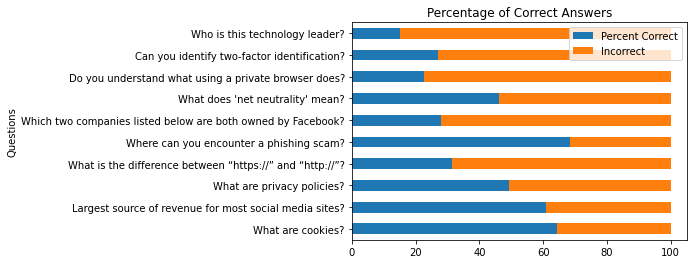

In [19]:
plot_knowledge.plot( 
    x = 'Questions',
    kind = 'barh', 
    stacked = True, 
    title = 'Percentage of Correct Answers', 
    mark_right = True)

# Concern and Understanding

## Trivia v. Concern

In [126]:
priv_brows_q = df1[df1["KNOW3_W49"] == "Has created a contract between itself and its users about how it will use their data"]


In [1]:
df1[df1["KNOW3_W49"] == "Has created a contract between itself and its users about how it will use their data"]

NameError: name 'df1' is not defined

<AxesSubplot:title={'center':'How concerned are those who know what a private browser does?'}>

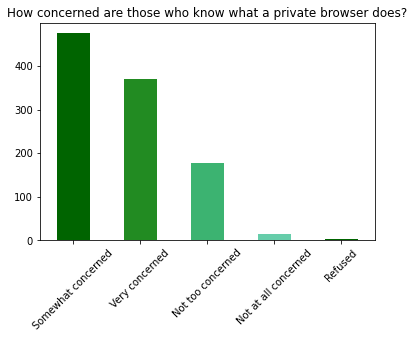

In [128]:
priv_brows_q["CONCERNCO_W49"].value_counts().plot(kind="bar", title='How concerned are those who know what a private browser does?' ,color=['darkgreen', 'forestgreen', 'mediumseagreen', 'mediumaquamarine'], rot=45)

In [153]:
#Statistically significant, but not visible in graph, why?
pd.crosstab([df1["KNOW3_W49"] == "Has created a contract between itself and its users about how it will use their data"], df1["CONCERNCO_W49"])
stats.chi2_contingency(third_x_conc)

(17.67883758215003,
 0.0014258001020555876,
 4,
 array([[ 30.89719626, 189.50280374,   2.57476636, 474.27196262,
         404.75327103],
        [ 29.10280374, 178.49719626,   2.42523364, 446.72803738,
         381.24672897]]))

In [154]:
#It seems that there is only a statistical significance when 
#people are "not at all concerned"
#The more people who answered correctly, are less likely to fall
#in this column. 
third_x_conc

CONCERNCO_W49,Not at all concerned,Not too concerned,Refused,Somewhat concerned,Very concerned
KNOW3_W49,,,,,
False,45,191,3,446,417
True,15,177,2,475,369


In [156]:
#When this column is dropped there is no statistical significance
pd.crosstab([df1["KNOW3_W49"] == "Has created a contract between itself and its users about how it will use their data"], df1["CONCERNCO_W49"])
stats.chi2_contingency(third_x_conc.drop(columns = 'Not at all concerned'))

(4.022349827183858,
 0.2590608439158567,
 3,
 array([[187.00769231,   2.54086538, 468.02740385, 399.42403846],
        [180.99230769,   2.45913462, 452.97259615, 386.57596154]]))

## Percieved Understanding v. Concern

In [139]:
#Education changes whether risk outweighs benefit, v minisculely 
concern_x_under = pd.crosstab(df1['CONCERNCO_W49'], df1['UNDERSTANDCO_W49'])
stats.chi2_contingency(concern_x_under)


(310.16297283075005,
 1.9969989926996106e-56,
 16,
 array([[3.70093458e+00, 6.78504673e+00, 2.80373832e-01, 2.00747664e+01,
         2.91588785e+01],
        [2.26990654e+01, 4.16149533e+01, 1.71962617e+00, 1.23125234e+02,
         1.78841121e+02],
        [3.08411215e-01, 5.65420561e-01, 2.33644860e-02, 1.67289720e+00,
         2.42990654e+00],
        [5.68093458e+01, 1.04150467e+02, 4.30373832e+00, 3.08147664e+02,
         4.47588785e+02],
        [4.84822430e+01, 8.88841121e+01, 3.67289720e+00, 2.62979439e+02,
         3.81981308e+02]]))

In [131]:
#Transform answers into ordinal values

x_map = {'Somewhat concerned' : 2, 'Not too concerned' : 1, 'Very concerned' : 3, 'Not at all concerned':0}
y_map = {'Nothing' : 0, 'Very little' : 1, 'Some' : 2, 'A great deal' : 3 }

In [132]:
df1['CONCERNGOV_W49'].map(x_map).reset_index()

,index,CONCERNGOV_W49
0,0,1.0
1,1,NaN
2,2,NaN
3,3,0.0
4,4,NaN
...,...,...
4267,4267,2.0
4268,4268,2.0
4269,4269,1.0
4270,4270,2.0


In [136]:
#Merge and drop NaN rows
first_corr_df = df1.UNDERSTANDGOV_W49.map(y_map).reset_index().merge(df1['CONCERNGOV_W49'].map(x_map).reset_index(), on = 'index').dropna().drop(columns = 'index')

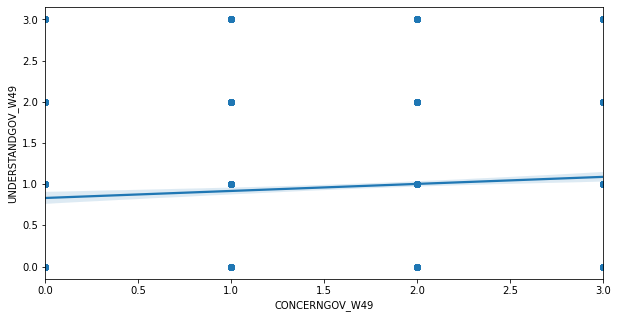

In [137]:
#Define x and y
x = df1['CONCERNGOV_W49'].value_counts(normalize=True)
y = df1['UNDERSTANDGOV_W49'].value_counts(normalize=True)

#Plot
fig, ax = plt.subplots(figsize=(10,5))

sns.regplot(x = first_corr_df['CONCERNGOV_W49'], y = first_corr_df['UNDERSTANDGOV_W49'], ax = ax);

In [138]:
model = OLS(endog = first_corr_df['UNDERSTANDGOV_W49'], exog = first_corr_df['CONCERNGOV_W49'])
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      UNDERSTANDGOV_W49   R-squared (uncentered):                   0.544
Model:                            OLS   Adj. R-squared (uncentered):              0.543
Method:                 Least Squares   F-statistic:                              2522.
Date:                Wed, 25 Nov 2020   Prob (F-statistic):                        0.00
Time:                        10:36:53   Log-Likelihood:                         -2635.7
No. Observations:                2118   AIC:                                      5273.
Df Residuals:                    2117   BIC:                                      5279.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
CONCERNGOV_W49     0.4500      0.009     50.223      0.000       0.432       0.468
==============================================================================
Omnibus:                       38.897   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.829
Skew:                           0.322   Prob(JB):                     1.36e-09
Kurtosis:                       3.219   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Education Comparisons

In [203]:
df1["F_EDUCCAT"].value_counts()


College graduate+        1600
H.S. graduate or less    1483
Some College             1182
Don't know/Refused          7
Name: F_EDUCCAT, dtype: int64

In [206]:
perc_college_grad = 1600 / (1483 + 1182 + 7)

In [116]:
education_risk = more_risk['F_EDUCCAT'].value_counts() / pd.concat([more_benefit, more_risk]).F_EDUCCAT.value_counts()
education_risk

College graduate+        0.819095
H.S. graduate or less    0.819832
Some College             0.862010
Don't know/Refused       1.000000
Name: F_EDUCCAT, dtype: float64

In [166]:
#Education changes whether risk outweighs benefit, v minisculely 
edu_x_risk = pd.crosstab(df1['BENEFITGOV_W49'], df1["F_EDUCCAT"])
stats.chi2_contingency(edu_x_risk)

(33.1978857991743,
 0.0009015114660431665,
 12,
 array([[2.88208255e+01, 7.22326454e-02, 2.70150094e+01, 2.10919325e+01],
        [2.73984991e+02, 6.86679174e-01, 2.56818011e+02, 2.00510319e+02],
        [5.98874296e+00, 1.50093809e-02, 5.61350844e+00, 4.38273921e+00],
        [1.42606942e+02, 3.57410882e-01, 1.33671670e+02, 1.04363977e+02],
        [3.46598499e+02, 8.68667917e-01, 3.24881801e+02, 2.53651032e+02]]))

In [167]:
edu_x_risk

F_EDUCCAT,College graduate+,Don't know/Refused,H.S. graduate or less,Some College
BENEFITGOV_W49,,,,
A great deal,21,0,31,25
None,228,0,292,212
Refused,4,0,7,5
Some,164,0,128,89
Very little,381,2,290,253


In [171]:
edu_x_risk = pd.crosstab(df1['BENEFITGOV_W49'], df1["F_EDUCCAT"])
stats.chi2_contingency(edu_x_risk.drop(columns = 'College graduate+'))

(5.957408923727593,
 0.6520028590105748,
 8,
 array([[8.39580210e-02, 3.14002999e+01, 2.45157421e+01],
        [7.55622189e-01, 2.82602699e+02, 2.20641679e+02],
        [1.79910045e-02, 6.72863568e+00, 5.25337331e+00],
        [3.25337331e-01, 1.21676162e+02, 9.49985007e+01],
        [8.17091454e-01, 3.05592204e+02, 2.38590705e+02]]))

<a class="anchor" id="age"></a>

# Age Comparisons

## Age vs. Risk

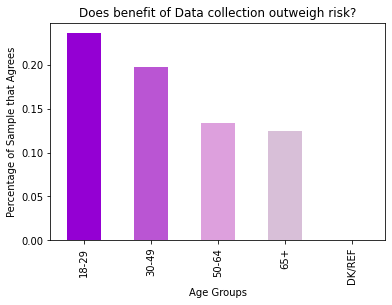

In [9]:
#Creating dataframes to pull from
more_benefit = df1[df1['POSNEGCO_W49'] == 'The benefits I get from companies collecting data about me outweigh the potential risks']
more_risk = df1[df1['POSNEGCO_W49'] == 'The potential risks of companies collecting data about me outweigh the benefits I get']

#Standardizing sample data 
risk_age = more_benefit['F_AGECAT'].value_counts() / pd.concat([more_benefit, more_risk]).F_AGECAT.value_counts()

#Create bar plot
risk_age.plot(kind='bar', title='Does benefit of Data collection outweigh risk?', color=['darkviolet', 'mediumorchid', 'plum', 'thistle'])
plt.xlabel('Age Groups')
plt.ylabel('Percentage of Sample that Agrees')

#Save bar plot
plt.savefig("Age_x_Risk")

In [10]:
risk_age


18-29     0.235988
30-49     0.197853
50-64     0.134165
65+       0.125000
DK/REF         NaN
Name: F_AGECAT, dtype: float64

### Chi Squared Test

In [11]:
#Frequencies higher than 5 : Trust results
#Pvalue < 0.05 : Reject null hypothesis

#There is a correlation between Age and whether you think the benefit outweighs the risk.
risk_x_age = pd.crosstab(df1['POSNEGCO_W49'], df1['F_AGECAT'])
stats.chi2_contingency(risk_x_age)

(31.321811270781463,
 2.2003108721588955e-05,
 6,
 array([[  5.75327103,  11.10280374,  11.00186916,   8.14205607],
        [ 56.57383178, 109.17757009, 108.18504673,  80.0635514 ],
        [279.6728972 , 539.71962617, 534.81308411, 395.79439252]]))

## Age vs. Knowledge

In [114]:
#Company - freq under 5
underco_x_age = pd.crosstab(df1["UNDERSTANDCO_W49"], df1['F_AGECAT'])
stats.chi2_contingency(underco_x_age)

(8.19902225853018,
 0.7693904421757115,
 12,
 array([[ 21.0953271 ,  40.71028037,  40.34018692,  29.85420561],
        [ 38.67476636,  74.63551402,  73.95700935,  54.73271028],
        [  1.59813084,   3.08411215,   3.05607477,   2.26168224],
        [114.42616822, 220.82242991, 218.81495327, 161.9364486 ],
        [166.20560748, 320.74766355, 317.8317757 , 235.21495327]]))

In [174]:
underco_x_age

F_AGECAT,18-29,30-49,50-64,65+
UNDERSTANDCO_W49,,,,
A great deal,24,42,46,20
Nothing,40,77,73,52
Refused,3,2,2,3
Some,117,223,213,163
Very little,158,316,320,246


In [180]:
#Even when you only look at furthest age ranges, no significance
underco_x_age = pd.crosstab(df1["UNDERSTANDCO_W49"], df1['F_AGECAT'])
stats.chi2_contingency(underco_x_age.drop(['30-49','50-64'], axis=1))

(4.3718983482543665,
 0.35800836904082317,
 4,
 array([[ 18.21791768,  25.78208232],
        [ 38.09200969,  53.90799031],
        [  2.4842615 ,   3.5157385 ],
        [115.93220339, 164.06779661],
        [167.27360775, 236.72639225]]))

In [70]:
#Government - freq under 5
undergov_x_age = pd.crosstab(df1["UNDERSTANDGOV_W49"], df1['F_AGECAT'])
stats.chi2_contingency(undergov_x_age)

(11.433118817427314,
 0.7819954135766289,
 16,
 array([[1.26538462e+01, 2.51538462e+01, 2.51538462e+01, 1.89615385e+01,
         7.69230769e-02],
        [8.34845216e+01, 1.65954034e+02, 1.65954034e+02, 1.25099906e+02,
         5.07504690e-01],
        [9.25891182e-01, 1.84052533e+00, 1.84052533e+00, 1.38742964e+00,
         5.62851782e-03],
        [5.46275797e+01, 1.08590994e+02, 1.08590994e+02, 8.18583490e+01,
         3.32082552e-01],
        [1.77308161e+02, 3.52460600e+02, 3.52460600e+02, 2.65692777e+02,
         1.07786116e+00]]))

## Why does benefit outweigh risk for younger people? 

In [123]:
#There is correlation between age and whether the ads reflect your actual interests
#Shows usefulness and maybe explains why benefit outweigh risk for younger people
reflect_x_age = pd.crosstab(df1["PROFILE5_W49"], df1['F_AGECAT'])
stats.chi2_contingency(reflect_x_age)

(70.90913128023014,
 2.1642185759405461e-10,
 12,
 array([[143.10546875, 303.14453125, 286.875     , 201.875     ],
        [ 19.13174716,  40.52734375,  38.35227273,  26.98863636],
        [  1.9897017 ,   4.21484375,   3.98863636,   2.80681818],
        [235.85617898, 499.62109375, 472.80681818, 332.71590909],
        [ 30.91690341,  65.4921875 ,  61.97727273,  43.61363636]]))

In [124]:
#No correlation between age and whether people have read about
#using people's data to profile them as a customer

readad_x_age = pd.crosstab(df1['PROFILE1_W49'], df1['F_AGECAT'])
stats.chi2_contingency(readad_x_age)


(16.35382503046973,
 0.17556231369243155,
 12,
 array([[3.40212079e+02, 6.66227528e+02, 6.63185393e+02, 4.95360955e+02,
         1.01404494e+00],
        [1.87697800e+02, 3.67563202e+02, 3.65884831e+02, 2.73294710e+02,
         5.59456929e-01],
        [1.39477528e+02, 2.73134831e+02, 2.71887640e+02, 2.03084270e+02,
         4.15730337e-01],
        [3.61259363e+00, 7.07443820e+00, 7.04213483e+00, 5.26006554e+00,
         1.07677903e-02]]))

In [125]:
#No correlation between age and whether people understand how companys
#using people's data to profile them as a customer

ADunder_x_age = pd.crosstab(df1['PROFILE4_W49'], df1['F_AGECAT'])
stats.chi2_contingency(ADunder_x_age)

(15.413532797577655,
 0.219596608321683,
 12,
 array([[ 58.77272727, 124.5       , 117.81818182,  82.90909091],
        [ 17.29509943,  36.63671875,  34.67045455,  24.39772727],
        [137.74857955, 291.796875  , 276.13636364, 194.31818182],
        [  1.3774858 ,   2.91796875,   2.76136364,   1.94318182],
        [215.80610795, 457.1484375 , 432.61363636, 304.43181818]]))

# Cleaning for tableau

In [184]:
#Merge and drop NaN
under_conc = df1.UNDERSTANDGOV_W49.map(y_map).reset_index().merge(df1['CONCERNGOV_W49'].map(x_map).reset_index(), on = 'index').dropna().drop(columns = 'index')

In [186]:
under_conc.to_csv("Understand_Concern.csv")

In [187]:
under_conc

,UNDERSTANDGOV_W49,CONCERNGOV_W49
0,0.0,1.0
3,1.0,0.0
5,1.0,2.0
11,1.0,3.0
12,1.0,2.0
...,...,...
4267,1.0,2.0
4268,1.0,2.0
4269,3.0,1.0
4270,1.0,2.0
